In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
results_dir = '/mnt/disks/large/output/cnnrnn_final/test/test-01/dev_visualization'
#results_dir = '/mnt/disks/large/output/cnnrnn_test_cropOnly/test/test-01/dev_visualization'

In [3]:
with open(results_dir, 'rb') as f:
    results_attn = pickle.load(f)

In [4]:
labels_pred = results_attn['labels_pred']
alphas = results_attn['alphas']
imgs = results_attn['imgs']
ids = results_attn['orig_id']

In [15]:
print(labels_pred.shape) # (batch_size * ncrops, NUM_CLASSES)
print(alphas.shape) # (batch_size * ncrops, MAX_LABEL_LENGTH, 14*14)
print(imgs.shape) # (batch_size, ncrops, n_channels, 224, 224)
imgs = imgs.reshape([-1, 6, 224, 224, 3])
print(len(ids))

(240, 1103)
(240, 10, 196)
(240, 224, 224, 3)
40


In [44]:
from PIL import Image 
def visualize_preproc(img_path, images):
    ncrops = images.shape[0]
    
    # raw image
    raw_img = Image.open(img_path)
    plt.subplot(1, ncrops+1, 1)
    plt.imshow(raw_img)
    plt.axis('off')
    
    # preprocessed images
    for i in range(ncrops):
        plt.subplot(1, ncrops+1, i+2)
        plt.imshow(images[i,:])
        plt.axis('off')
    plt.show()

In [45]:
img_dir = '/mnt/disks/large/data/train_split/val'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


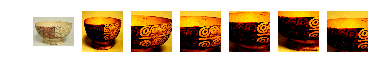

In [46]:
import os
idx = 0
img_path = os.path.join(img_dir, ids[idx])
images = imgs[idx, :]
visualize_preproc(img_path, images)